# CTM MILP Formulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
import time

from ctmmodels.const import *
from ctmmodels.altphasing import Constraint6AltPhasingModel

## Using the Module

In [79]:
# model1 = Constraint5Model(
#     sat_flow_rate=600,
#     demand=450,
# )
# model1.generate()

model2 = Constraint6AltPhasingModel(
    r_left=1.0/3.0,
    r_through=1.0/3.0,
    r_right=1.0/3.0,
    demand=600,
    sat_flow_rate=600,
    g_min=10,
    time_range=60
)
model2.generate()

In [80]:
print("New:")
model2.solve(log_output=True)

New:
Solving...
CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve eliminated 3920 rows and 652 columns.
MIP Presolve modified 1576 coefficients.
Aggregator did 328 substitutions.
Reduced MIP has 6956 rows, 3580 columns, and 26408 nonzeros.
Reduced MIP has 480 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.03 sec. (28.16 ticks)
Found incumbent of value 9760.000000 after 0.06 sec. (53.92 ticks)
Probing fixed 0 vars, tightened 303 bounds.
Probing time = 0.01 sec. (1.39 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 1280 rows and 224 columns.
Aggregator did 176 substitutions.
Reduced MIP has 5500 rows, 3180 columns, and 22780 nonzeros.
Reduced MIP has 480 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (12.01 ticks)
Probing time = 0.01 sec. (0.96 ticks)
Tried aggregator 1 time.
Reduced MIP has 5500 rows, 3180 columns, and 22780 nonzeros.
Reduced MIP has 480 binaries, 0 generals, 0 SOSs, and 0 ind

20.935745000839233

## Showing the Cell Capacities

In [81]:
model = model2

In [82]:
df_x, df_y, df_g = model.return_solution()

In [83]:
approach = 0

In [84]:
df_x_source = df_x[df_x.cell == (CELL_SOURCE,0,approach)].sort_values(by='timestep')
df_x_normal0 = df_x[df_x.cell == (CELL_NORMAL,0,approach)].sort_values(by='timestep')
df_x_normal1 = df_x[df_x.cell == (CELL_NORMAL,1,approach)].sort_values(by='timestep')
df_x_normal2 = df_x[df_x.cell == (CELL_NORMAL,2,approach)].sort_values(by='timestep')
df_x_left = df_x[df_x.cell == (CELL_MOVEMENT,THROUGH_TURN,approach)].sort_values(by='timestep')
df_x_sink = df_x[df_x.cell == model.S[(CELL_MOVEMENT,THROUGH_TURN,approach)][0]].sort_values(by='timestep')

df_x_approach = df_x_source.append(df_x_normal1).append(df_x_normal2).append(df_x_normal0).append(df_x_left).append(df_x_sink)
df_x_approach = df_x_approach.pivot(index='timestep', columns='cell', values='volume')
df_x_approach

cell,"(0, 0, 0)","(1, 0, 2)","(2, 1, 0)","(3, 0, 0)","(3, 1, 0)","(3, 2, 0)"
timestep,,,,,,
0,1.333333,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.333333,0.000000,0.000000,1.333333,0.000000,0.000000
2,1.333333,0.000000,0.000000,1.333333,1.333333,0.000000
3,1.333333,0.000000,0.000000,1.333333,1.333333,1.333333
4,1.333333,0.000000,0.333333,1.333333,1.333333,1.666667
5,1.333333,0.333333,0.666667,1.333333,1.333333,2.000000
6,1.333333,0.333333,1.000000,1.333333,1.333333,2.333333
7,1.333333,0.333333,1.333333,1.333333,1.333333,2.666667
8,1.333333,0.333333,1.666667,1.333333,1.333333,3.000000


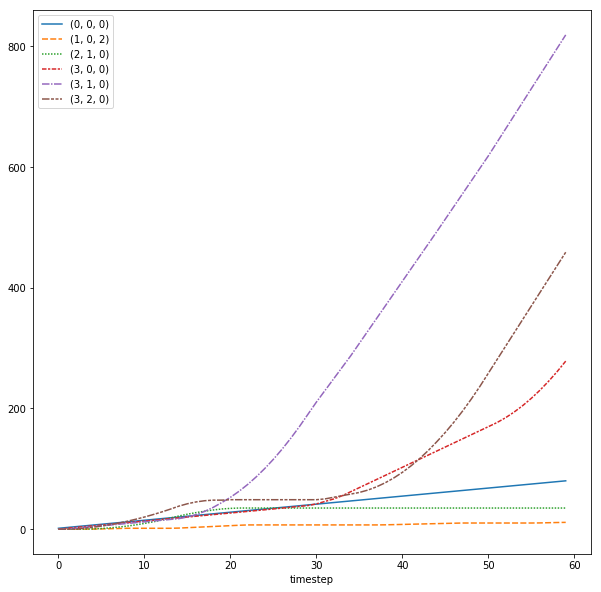

In [86]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_x_approach.cumsum())

This linear, cascading cumulative sum of consecutive cells (except for the through cell) means that the turning ratio is working fine.

In [87]:
df_y_source = df_y[df_y.cell_from == (CELL_SOURCE,0,approach)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal0 = df_y[df_y.cell_from == (CELL_NORMAL,0,approach)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal1 = df_y[df_y.cell_from == (CELL_NORMAL,1,approach)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,approach)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,approach)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_left = df_y[df_y.cell_from == (CELL_MOVEMENT,THROUGH_TURN,approach)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_sink = df_y[df_y.cell_from == model.S[(CELL_MOVEMENT,THROUGH_TURN,approach)][0]].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')

df_y_approach = df_y_source.append(df_y_normal1).append(df_y_normal2).append(df_y_normal0).append(df_y_left).append(df_y_sink)
df_y_approach.reset_index(inplace=True)
df_y_approach = df_y_approach.pivot(index='timestep', columns='cell_from', values='flow')
df_y_approach

cell_from,"(0, 0, 0)","(2, 1, 0)","(3, 0, 0)","(3, 1, 0)","(3, 2, 0)"
timestep,,,,,
0,1.333333,0.000000,0.000000,0.000000,0.000000
1,1.333333,0.000000,1.333333,0.000000,0.000000
2,1.333333,0.000000,1.333333,1.333333,0.000000
3,1.333333,0.000000,1.333333,1.333333,1.000000
4,1.333333,0.000000,1.333333,1.333333,1.000000
5,1.333333,0.000000,1.333333,1.333333,1.000000
6,1.333333,0.000000,1.333333,1.333333,1.000000
7,1.333333,0.000000,1.333333,1.333333,1.000000
8,1.333333,0.000000,1.333333,1.333333,1.000000


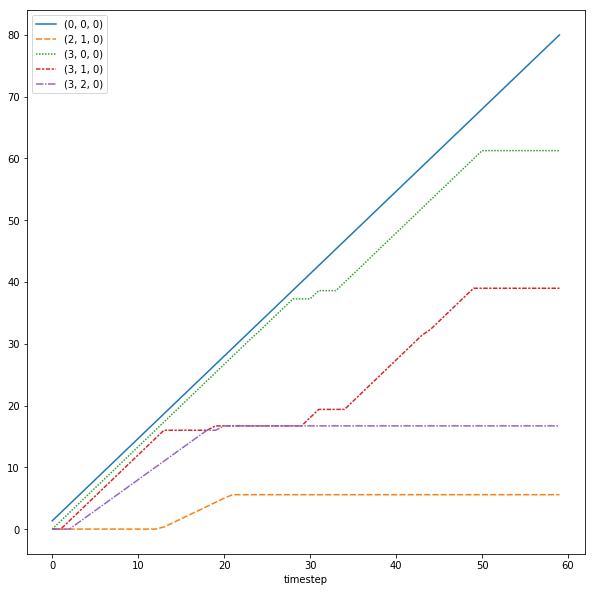

In [89]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_y_approach.cumsum())

### Comparing the Green Signal and the Flow

In [90]:
df_g_specific = df_g[df_g.cell == (1,0,1)].sort_values(by='timestep')
df_g_specific.cell = df_g_specific.cell.apply(lambda x: (CELL_MOVEMENT,THROUGH_TURN,1))
df_y_specific = df_y[(df_y.cell_from == (CELL_MOVEMENT,THROUGH_TURN,1)) & (df_y.cell_to == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0])].sort_values(by='timestep')
df_y_specific = df_y_specific.groupby(['timestep', 'cell_from']).agg({'flow': 'sum'}).reset_index()

df_g_y = pd.merge(df_g_specific, df_y_specific, left_on=['timestep', 'cell'], right_on=['timestep', 'cell_from'])[
    ['timestep', 'is_green', 'flow']
]

df_g_y.set_index('timestep', inplace=True)

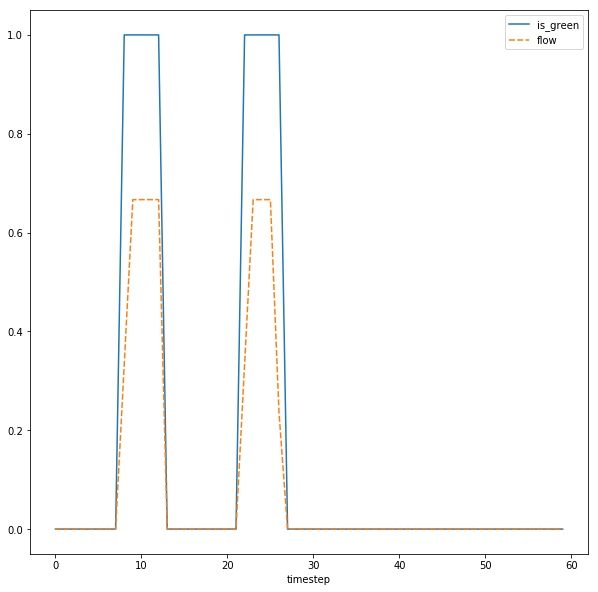

In [91]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_g_y)

## Checking the green times of the 8 phases

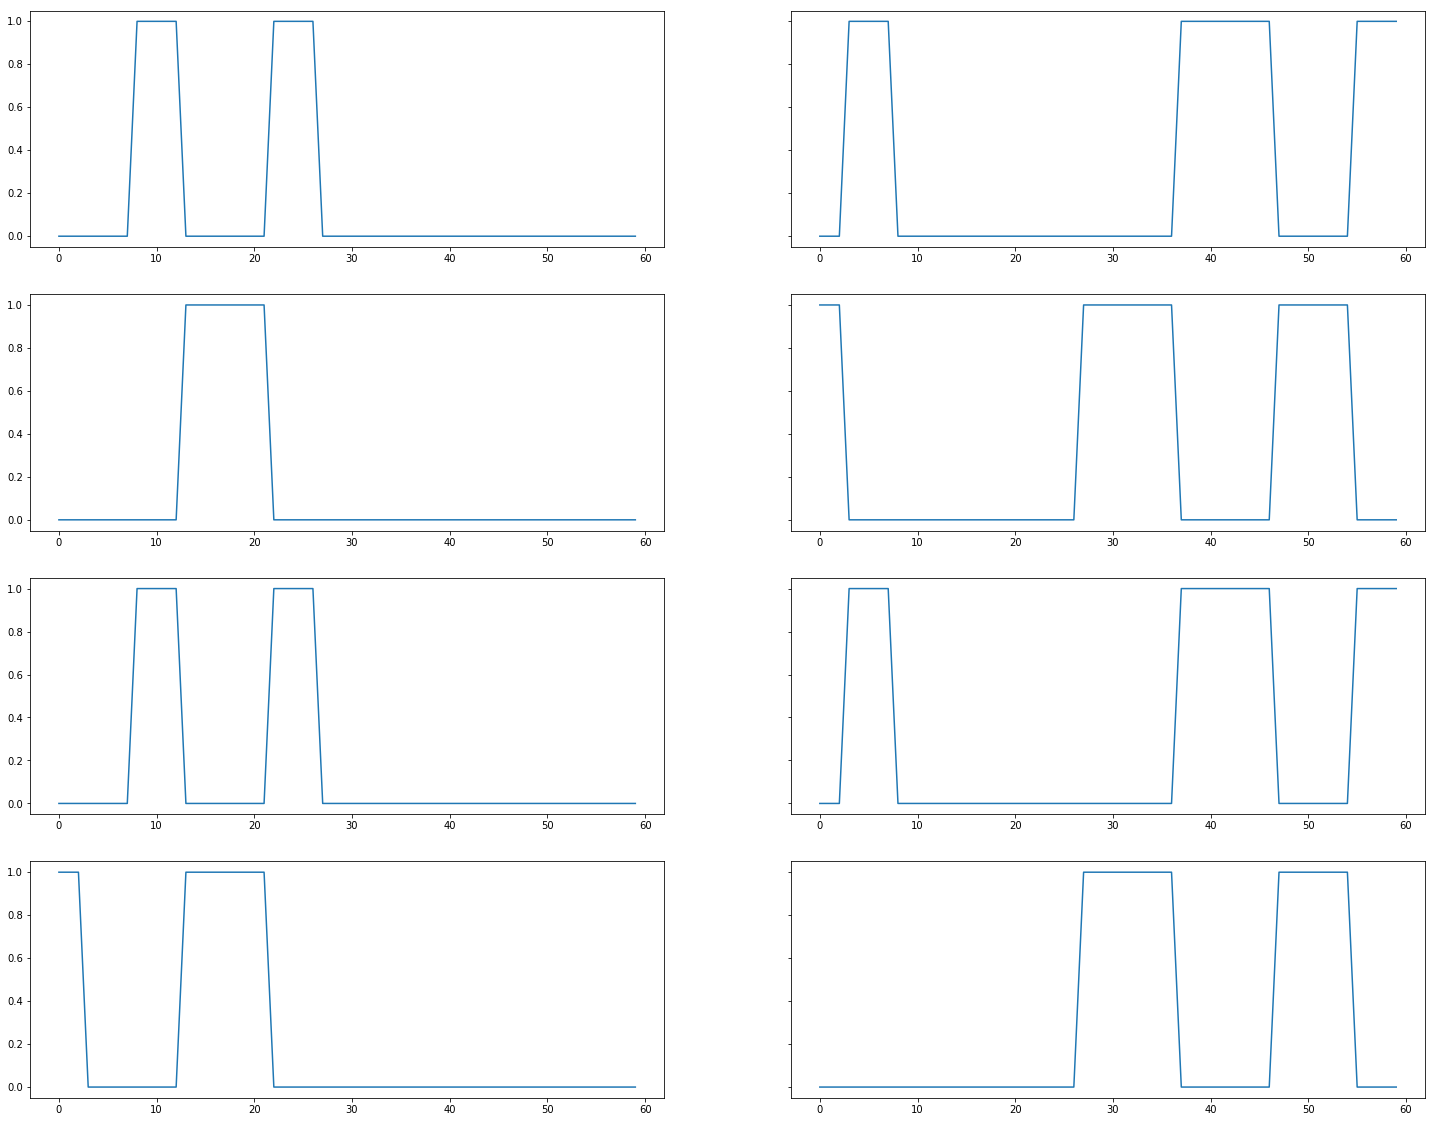

In [92]:
df_g_map = df_g.pivot(index='timestep', columns='cell', values='is_green')
throughs = [intToBinTuple(x) for x in [1,3,5,7]]
lefts = [intToBinTuple(x) for x in [0,2,4,6]]

_, axs = plt.subplots(4,2,figsize=(25,20), sharey=True)

for ndx, t in enumerate(throughs):
    sns.lineplot(data=df_g_map[t], ax=axs[ndx][0])
    
for ndx, l in enumerate(lefts):
    sns.lineplot(data=df_g_map[l], ax=axs[ndx][1])